# Auswertung der StreamingHistory von Spotify nach Künstlern

In [151]:
import json

In [152]:
import matplotlib.pyplot as plt

In [153]:
filename = 'my_spotify_data2\MyData\StreamingHistory0.json'

In [154]:
data0 = json.load(open(filename, 'r', encoding='utf8'))

In [155]:
filename = 'my_spotify_data2\MyData\StreamingHistory1.json'

In [156]:
data1 = json.load(open(filename, 'r', encoding='utf8'))

In [157]:
filename = 'my_spotify_data2\MyData\StreamingHistory2.json'

In [158]:
data2 = json.load(open(filename, 'r', encoding='utf8'))

In [159]:
history = data0 + data1 + data2

In [181]:
history = data2

In [182]:
start = history[0]['endTime']
end = history[-1]['endTime']

In [183]:
artists = dict()

In [184]:
len(history)

6405

In [185]:
type(artists)

dict

In [186]:
for index in range(len(history)):
    if history[index]['artistName'] in artists:
        artists[history[index]['artistName']] += 1
    else:
        artists[history[index]['artistName']] = 1

dict Sortierung geklaut von https://www.tutorialsteacher.com/articles/sort-dict-by-value-in-python

In [187]:
markdict = artists
marklist = sorted((value, key) for (key,value) in markdict.items())
sortdict = dict([(k,v) for v,k in marklist])

In [188]:
keys = list(sortdict.keys())

In [189]:
keys[-1]

'Schmyt'

In [190]:
# drop top10
'''for index in range(-1, -11, -1):
    sortdict.pop(keys[-1])
    keys.pop(-1)'''

'for index in range(-1, -11, -1):\n    sortdict.pop(keys[-1])\n    keys.pop(-1)'

In [191]:
limitdict = dict()
index = 0
while index > -50:
    index -= 1
    limitdict[keys[index]] = sortdict[keys[index]]

In [192]:
len(limitdict)

50

In [193]:
x = limitdict.values()

In [194]:
y = limitdict.keys()

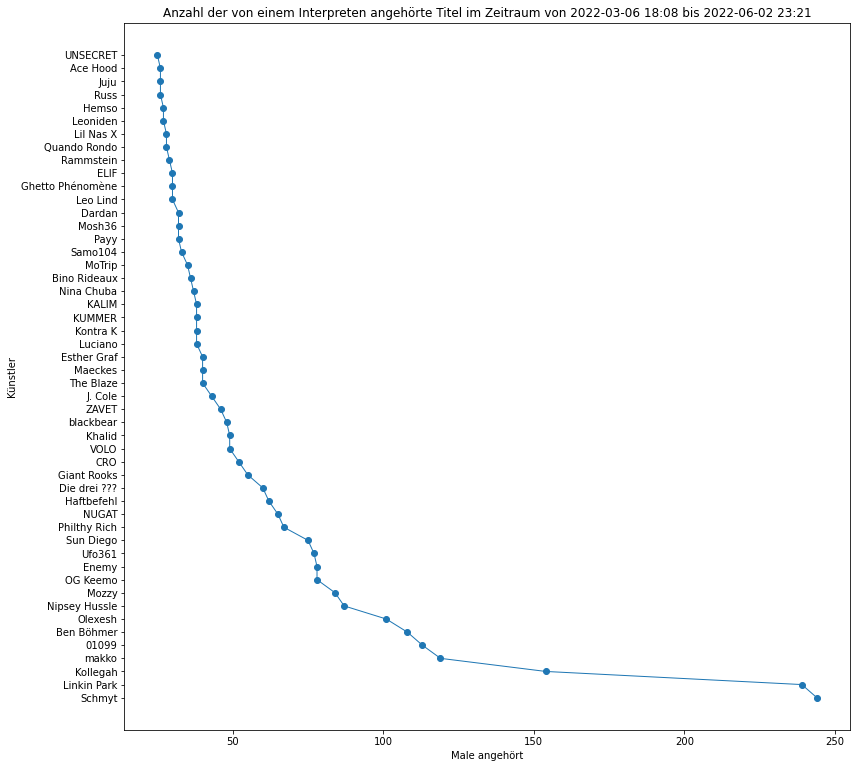

In [195]:
a = plt.figure(figsize=(13, 13))
b = plt.xlabel('Male angehört')
c = plt.ylabel('Künstler')
d = plt.plot(x, y, '-o', linewidth=1.0)
e = plt.title(f'Anzahl der von einem Interpreten angehörte Titel im Zeitraum von {start} bis {end}')
plt.savefig(f'top50interprets({end[:10]}).jpg',bbox_inches='tight', dpi=150)
f = plt.show()

In [196]:
tracks = dict()
for data in history:
    if data['trackName'] in tracks:
        tracks[data['trackName']] += 1
    else:
        tracks[data['trackName']] = 1
        
tracks_s = {key: val for key, val in sorted(tracks.items(), key = lambda ele: ele[1], reverse=True)}

In [197]:
len(tracks_s)

1492

In [198]:
keys = [key for key in tracks_s.keys()]

In [199]:
while len(keys) > 51:
    tracks_s.pop(keys[-1])
    keys.pop(-1)

In [200]:
x = tracks_s.values()

In [201]:
y = tracks_s.keys()

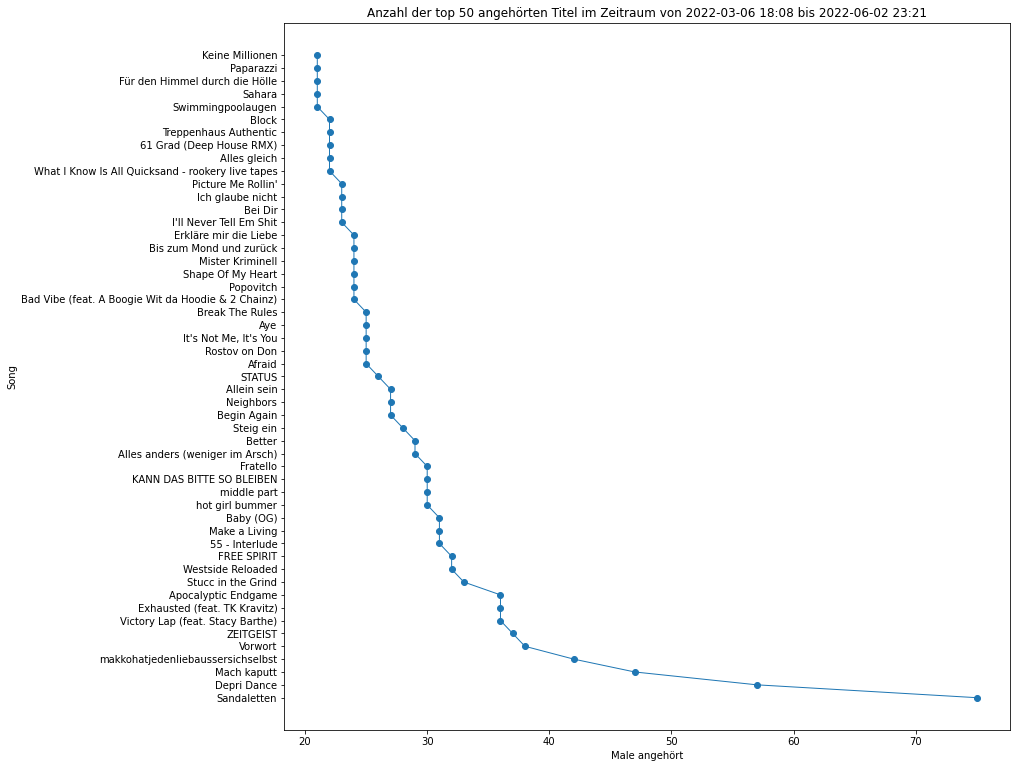

In [202]:
a = plt.figure(figsize=(13, 13))
b = plt.xlabel('Male angehört')
c = plt.ylabel('Song')
d = plt.plot(x, y, '-o', linewidth=1.0)
e = plt.title(f'Anzahl der top 50 angehörten Titel im Zeitraum von {start} bis {end}')
plt.savefig(f'top50songs({end[:10]}).jpg',bbox_inches='tight', dpi=150)
f = plt.show()